In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import random as random


## Training some decision trees for the Thai tone rules
In this notebook I train some decision trees for illustrating the rules governing the tone of a syllable in the Thai language. I use sklearn for this, so I'm limited to binary trees, and I have to use the one-hot encoding fudge to deal with the fact that the data is categorical. Despite this I found the trees quite helpful for learning the rules. There's a short section at the end for generating questions and answers for self testing.

In [2]:
# There are 5 tone marks in Thai if you include the absence of a mark
# These are 'Absent', 'mai-Eek', 'mai-Too', 'mai-Dtrii', 'mai-Jat-dta waa'
# Note that using 'Absent' ensures that when we do one-hot encoding later, this category is ommitted as it comes
# earliest in the alphabet
tone_mark = ['Absent','Eek', 'Too', 'Dtrii', 'Jat-dta waa']

# Each consonant is either of 'Low' 'Mid' or 'High' class
consonant_class = ['Low', 'Mid', 'High']

# A syllable is 'Live' if it ends with a long vowel or a 'sonorant' final consonant
# It is 'Dead' if it ends with a short vowel or a 'stop' final consonant
# What this means isn't important here, but there are 5 sonorant final consonant sounds and three 'stop' ones.
# You need to memorize these seperately.
# The distinction between long and short vowels is easy to make when you hear them pronounced,
# but of course you need to know the vowel symbles for to be able to detect this from the script.
syllable = ['Live', 'Dead']

# Sometimes you also need to worry about whether the vowel is short or long, even when the syllable ends with a consonant.
vowel = ['Long', 'Short']

In [3]:
columns = ['Tone Mark', 'Consonant Class', 'Syllable', 'Vowel', 'Tone']
df = pd.DataFrame(columns = columns)

df

,Tone Mark,Consonant Class,Syllable,Vowel,Tone


In [4]:
combinations = []
for t in tone_mark:
    for c in consonant_class:
        for s in syllable:
            for v in vowel:
                combinations.append([t,c,s,v])
                
len(combinations)
                

60

In [5]:
df[['Tone Mark', 'Consonant Class', 'Syllable', 'Vowel']] = combinations

In [6]:
df.head()

,Tone Mark,Consonant Class,Syllable,Vowel,Tone
0,Absent,Low,Live,Long,NaN
1,Absent,Low,Live,Short,NaN
2,Absent,Low,Dead,Long,NaN
3,Absent,Low,Dead,Short,NaN
4,Absent,Mid,Live,Long,NaN


We'll now apply the tone rules obtained from [here](http://www.thai-language.com/ref/tone-rules).

In [7]:
def tone_mark_present(factors):
    if factors[0] == 'Eek':
        if factors[1] == 'Low':
            return 'Falling'
        else:
            return 'Low'
    if factors[0] == 'Too':
        if factors[1] == 'Low':
            return 'High'
        else:
            return 'Falling'
    if factors[0] == 'Dtrii':
        return 'High'
    if factors[0] == 'Jat-dta waa':
        return 'Rising'
    else:
        return no_tone_mark(factors)
        
def no_tone_mark(factors):
    if factors[1] == 'Low':
        if factors[2] == 'Live':
            return 'Mid'
        else:
            if factors[3] == 'Short':
                return 'High'
            else:
                return 'Falling'
    if factors[1] == 'Mid':
        if factors[2] == 'Live':
            return 'Mid'
        else:
            return 'Low'
    if factors[1] == 'High':
        if factors[2] =='Live':
            return 'Rising'
        else:
            return 'Low'
            

In [8]:
df_tones = df
df_tones['Tone'] = df_tones[['Tone Mark', 'Consonant Class', 'Syllable', 'Vowel']].apply(tone_mark_present, axis = 1)
df_tones

,Tone Mark,Consonant Class,Syllable,Vowel,Tone
0,Absent,Low,Live,Long,Mid
1,Absent,Low,Live,Short,Mid
2,Absent,Low,Dead,Long,Falling
3,Absent,Low,Dead,Short,High
4,Absent,Mid,Live,Long,Mid
5,Absent,Mid,Live,Short,Mid
6,Absent,Mid,Dead,Long,Low
7,Absent,Mid,Dead,Short,Low
8,Absent,High,Live,Long,Rising
9,Absent,High,Live,Short,Rising


In [9]:
one_hot_data = pd.get_dummies(df_tones[['Tone Mark', 'Consonant Class', 'Syllable', 'Vowel']], prefix_sep=': ', 
                              drop_first=True)
one_hot_data.head()

,Tone Mark: Dtrii,Tone Mark: Eek,Tone Mark: Jat-dta waa,Tone Mark: Too,Consonant Class: Low,Consonant Class: Mid,Syllable: Live,Vowel: Short
0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,1,1
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,1,0


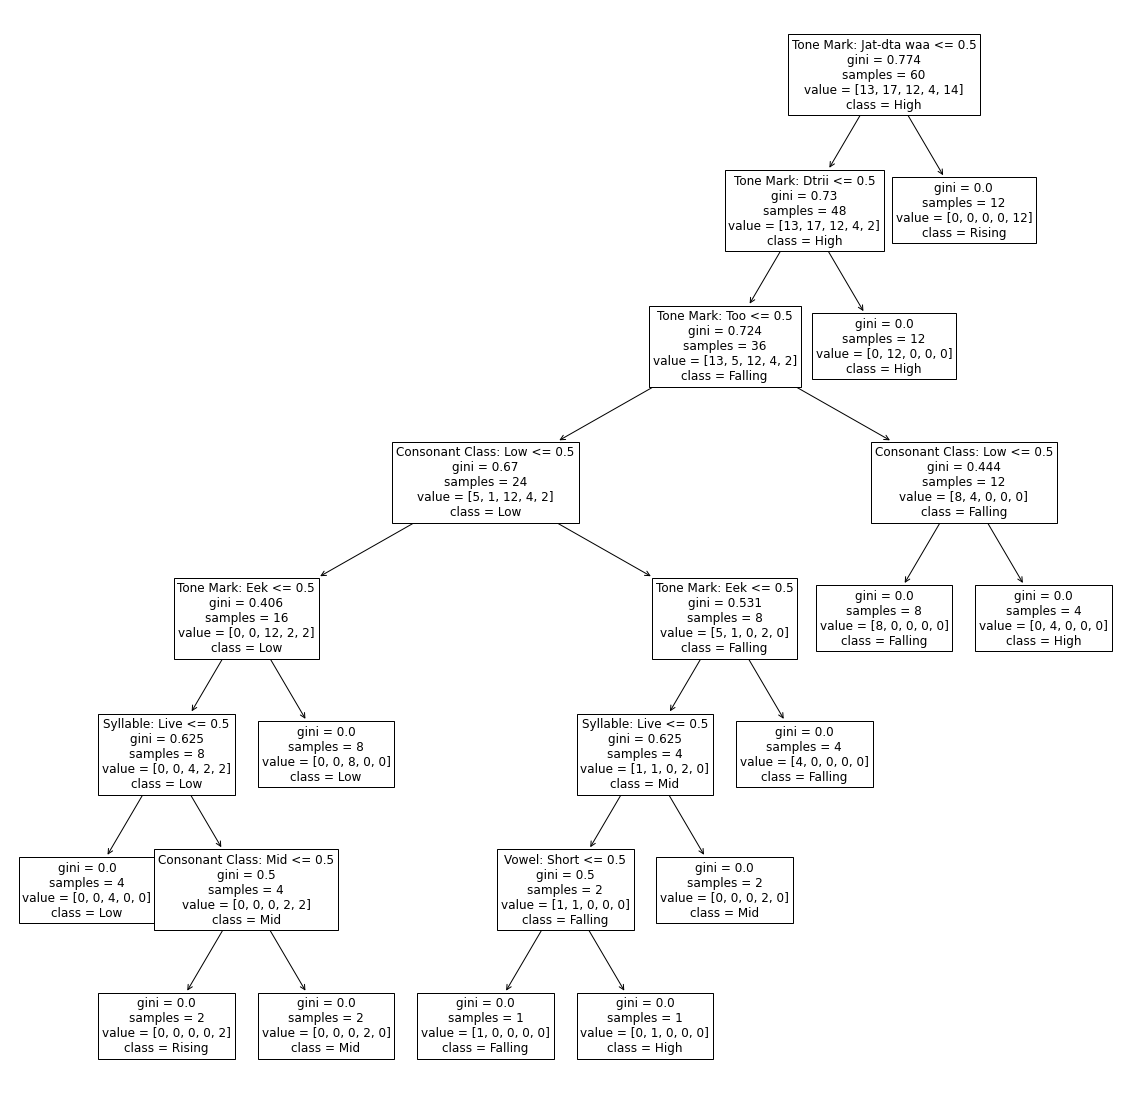

In [10]:
tree = DecisionTreeClassifier()

tree.fit(one_hot_data, df_tones['Tone'])

plt.figure(figsize=(20,20))
plot_tree(tree, feature_names = one_hot_data.columns, class_names = tree.classes_, fontsize= 12)
plt.show()


The tree above is quite complicated, as the binary nature enforced by sklearn means each of the 5 possible tone marks is treated individually, rather than branching all possibilities at the same time. This also applies to consonant class, but there are only 3 consonant classes vs 5 tone marks, so it's less of an issue. 

Below we'll consider the case where there is no tone mark, as this is something of a special case. This produces a tree that is easier for humans to parse. Moreover, it turns out that if we only consider syllables with a tone mark, we also get a simpler tree, as we'll see later.

In [11]:
df_no_mark = df_tones.loc[df_tones['Tone Mark'] == 'Absent'][['Consonant Class', 'Syllable', 'Vowel', 'Tone']]
df_no_mark

,Consonant Class,Syllable,Vowel,Tone
0,Low,Live,Long,Mid
1,Low,Live,Short,Mid
2,Low,Dead,Long,Falling
3,Low,Dead,Short,High
4,Mid,Live,Long,Mid
5,Mid,Live,Short,Mid
6,Mid,Dead,Long,Low
7,Mid,Dead,Short,Low
8,High,Live,Long,Rising
9,High,Live,Short,Rising


In [12]:
# Note that here I use drop_first=False, because I think including the tone mark Dtrii makes for a more readable tree
one_hot_data_2 = pd.get_dummies(df_no_mark[['Consonant Class', 'Syllable', 'Vowel']], prefix_sep=': ', 
                                drop_first=False)

one_hot_data_2

,Consonant Class: High,Consonant Class: Low,Consonant Class: Mid,Syllable: Dead,Syllable: Live,Vowel: Long,Vowel: Short
0,0,1,0,0,1,1,0
1,0,1,0,0,1,0,1
2,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1
4,0,0,1,0,1,1,0
5,0,0,1,0,1,0,1
6,0,0,1,1,0,1,0
7,0,0,1,1,0,0,1
8,1,0,0,0,1,1,0
9,1,0,0,0,1,0,1


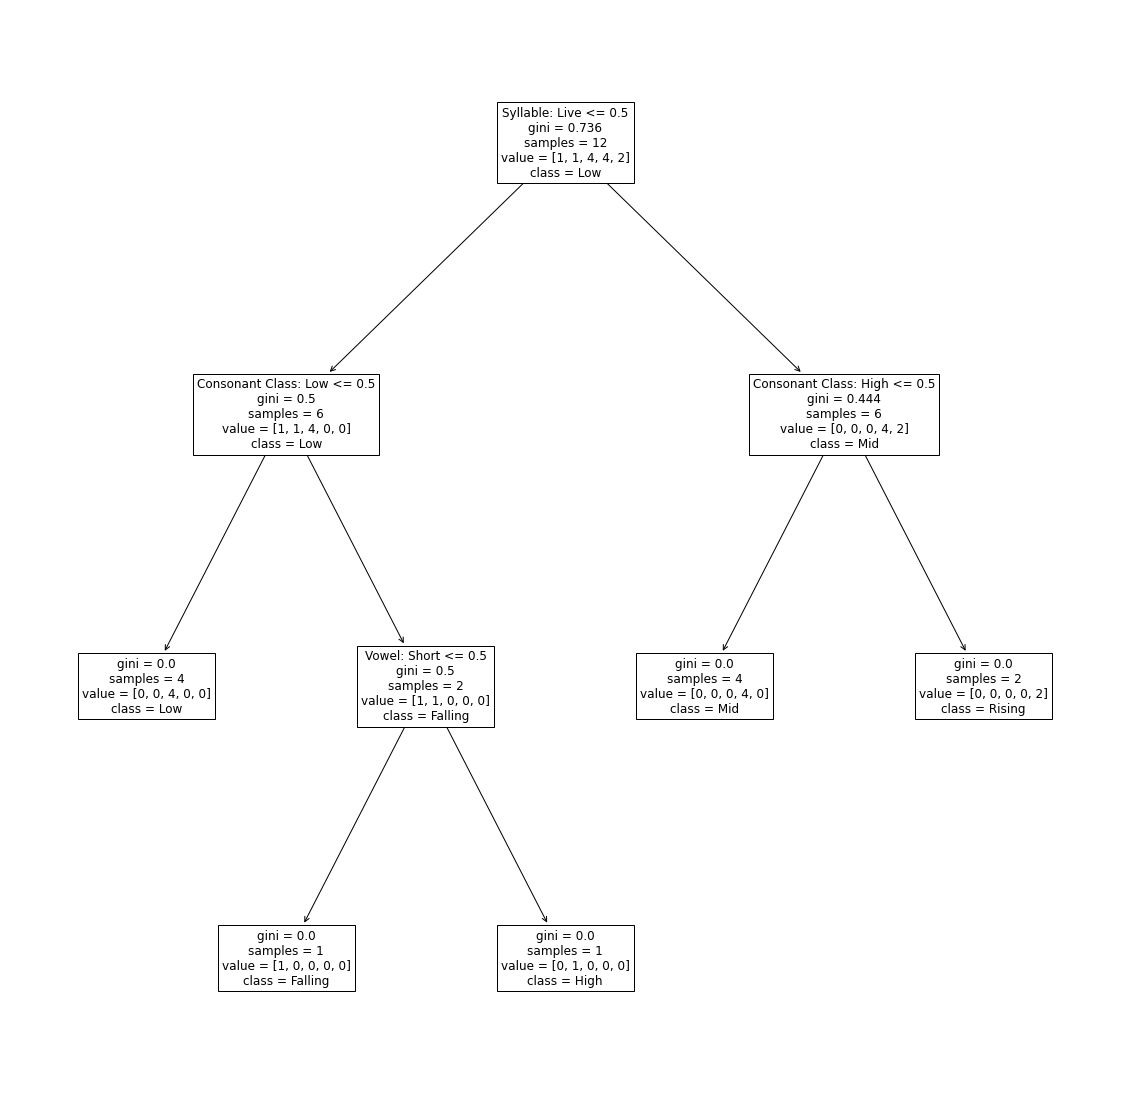

In [13]:
tree_2 = DecisionTreeClassifier()

tree_2.fit(one_hot_data_2, df_no_mark['Tone'])

plt.figure(figsize=(20,20))
plot_tree(tree_2, feature_names = one_hot_data_2.columns, class_names = tree_2.classes_, fontsize= 12)
plt.show()

In [14]:
df_mark = df_tones.loc[df_tones['Tone Mark'] != 'Absent'][['Tone Mark', 'Consonant Class', 'Syllable', 'Vowel', 'Tone']]
df_mark.head()

,Tone Mark,Consonant Class,Syllable,Vowel,Tone
12,Eek,Low,Live,Long,Falling
13,Eek,Low,Live,Short,Falling
14,Eek,Low,Dead,Long,Falling
15,Eek,Low,Dead,Short,Falling
16,Eek,Mid,Live,Long,Low


In [15]:
# Note that here I use drop_first=False, because I think including the tone mark Dtrii makes for a more readable tree
one_hot_data_3 = pd.get_dummies(df_mark[['Tone Mark', 'Consonant Class', 'Syllable', 'Vowel']], prefix_sep=': ', 
                                drop_first=False)

one_hot_data_3.head()

,Tone Mark: Dtrii,Tone Mark: Eek,Tone Mark: Jat-dta waa,Tone Mark: Too,Consonant Class: High,Consonant Class: Low,Consonant Class: Mid,Syllable: Dead,Syllable: Live,Vowel: Long,Vowel: Short
12,0,1,0,0,0,1,0,0,1,1,0
13,0,1,0,0,0,1,0,0,1,0,1
14,0,1,0,0,0,1,0,1,0,1,0
15,0,1,0,0,0,1,0,1,0,0,1
16,0,1,0,0,0,0,1,0,1,1,0


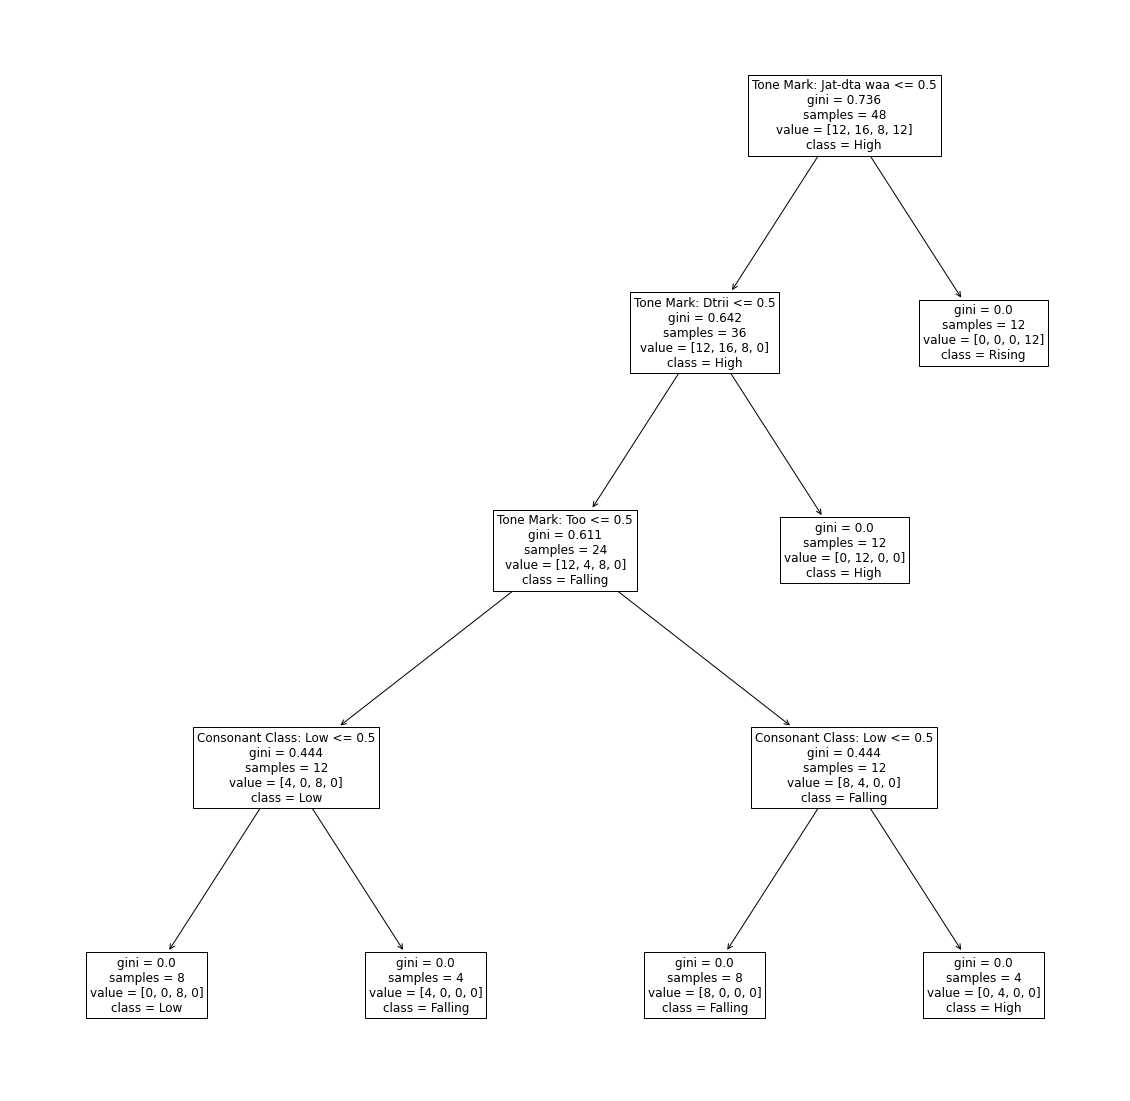

In [16]:
tree_3 = DecisionTreeClassifier()

tree_3.fit(one_hot_data_3, df_mark['Tone'])

plt.figure(figsize=(20,20))
plot_tree(tree_3, feature_names = one_hot_data_3.columns, class_names = tree_3.classes_, fontsize= 12)
plt.show()

Looking at the trees above we can work out a conceptually simple procedure for determining the tone of a syllable:

* Is there a tone mark? 
  * If yes look at the lead consonant class to get the tone.
    * Jat-dta waa always produces a Rising tone.
    * Dtrii always produces a High tone.
    * Eek produces a Falling tone for Low class consonants, and a Low tone for the others.
    * Too produces a High tone for Low class consonants, and a Falling tone for the others.
  * If no, is the syllable Live or Dead?
    * If Live, is the lead consonant High class or not?
      * If it is High, then the tone is Rising.
      * If it's not then the tone is Mid.
    * If Dead, is the lead consonant Low class?
      * If not, then the tone is Low.
      * if it is Low, then look at the length of the vowel.
        * If the vowel is long then the tone is Falling.
        * If the vowel is short then the tone is High.

## Self-testing using the trees
The cell below randomly chooses the tone mark, lead consonant class, syllable type and vowel length, and the cell after runs this through the first decision tree to find the correct tone so you can check your solution.

In [17]:
t = random.randrange(5)
c = random.randrange(3)
s = random.randrange(2)
v = random.randrange(2)

x = {'Tone Mark' : tone_mark[t], 'Consonant Class' : consonant_class[c], 'Syllable' : syllable[s], 'Vowel' : vowel[v]}

for key, value in x.items():
    print('{}: {}'.format(key,value))


Tone Mark: Jat-dta waa
Consonant Class: Mid
Syllable: Dead
Vowel: Short


In [18]:
x_hot = pd.DataFrame(0, columns=one_hot_data.columns, index = [0])

for key, value in x.items():
    x_hot.loc[0]['{}: {}'.format(key,value)] = 1
    
tree.predict(x_hot)[0]


'Rising'